# Performance of LeNet-5

In [38]:
% matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [66]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'x-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'pdf'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [69]:
base_dir = '/home/rbodo/.snntoolbox/data/mnist/cnn/lenet5/keras'
log_dir = os.path.join(base_dir, '32bit', 'log', 'gui')
runlabel_rate = '08'
runlabel_ttfs = '19'  # With softmax: '18'
runlabel_dyn_thresh = '20'  # With softmax: '24'
runlabel_clamped = '04'  # With softmax: '03'
runlabel_dyn_thresh2 = '21'  # With softmax: '25'. Includes operations due to threshold updates
path_rate = os.path.join(log_dir, runlabel_rate)
path_ttfs = os.path.join(log_dir, runlabel_ttfs)
path_dyn_thresh = os.path.join(log_dir, runlabel_dyn_thresh)
path_dyn_thresh2 = os.path.join(log_dir, runlabel_dyn_thresh2)
path_clamped = os.path.join(base_dir, 'clamped_relu', 'log', 'gui', runlabel_clamped)

In [70]:
exp_rate = ExpResults(path_rate, 'rate-code', 'D', 'gold', markersize=7)
exp_ttfs = ExpResults(path_ttfs, 'TTFS base', 'o', 'blue', markersize=7)
exp_dyn_thresh = ExpResults(path_dyn_thresh, 'TTFS dyn thresh', '^', 'red', markersize=7)
# exp_dyn_thresh2 = ExpResults(path_dyn_thresh2, 'TTFS dyn thresh\nincl thresh updates', 'v', 'red')
exp_clamped = ExpResults(path_clamped, 'TTFS clamped', 's', 'green', markersize=7)
experiments = [exp_rate, exp_ttfs, exp_dyn_thresh, exp_clamped]

## Plot error vs operations

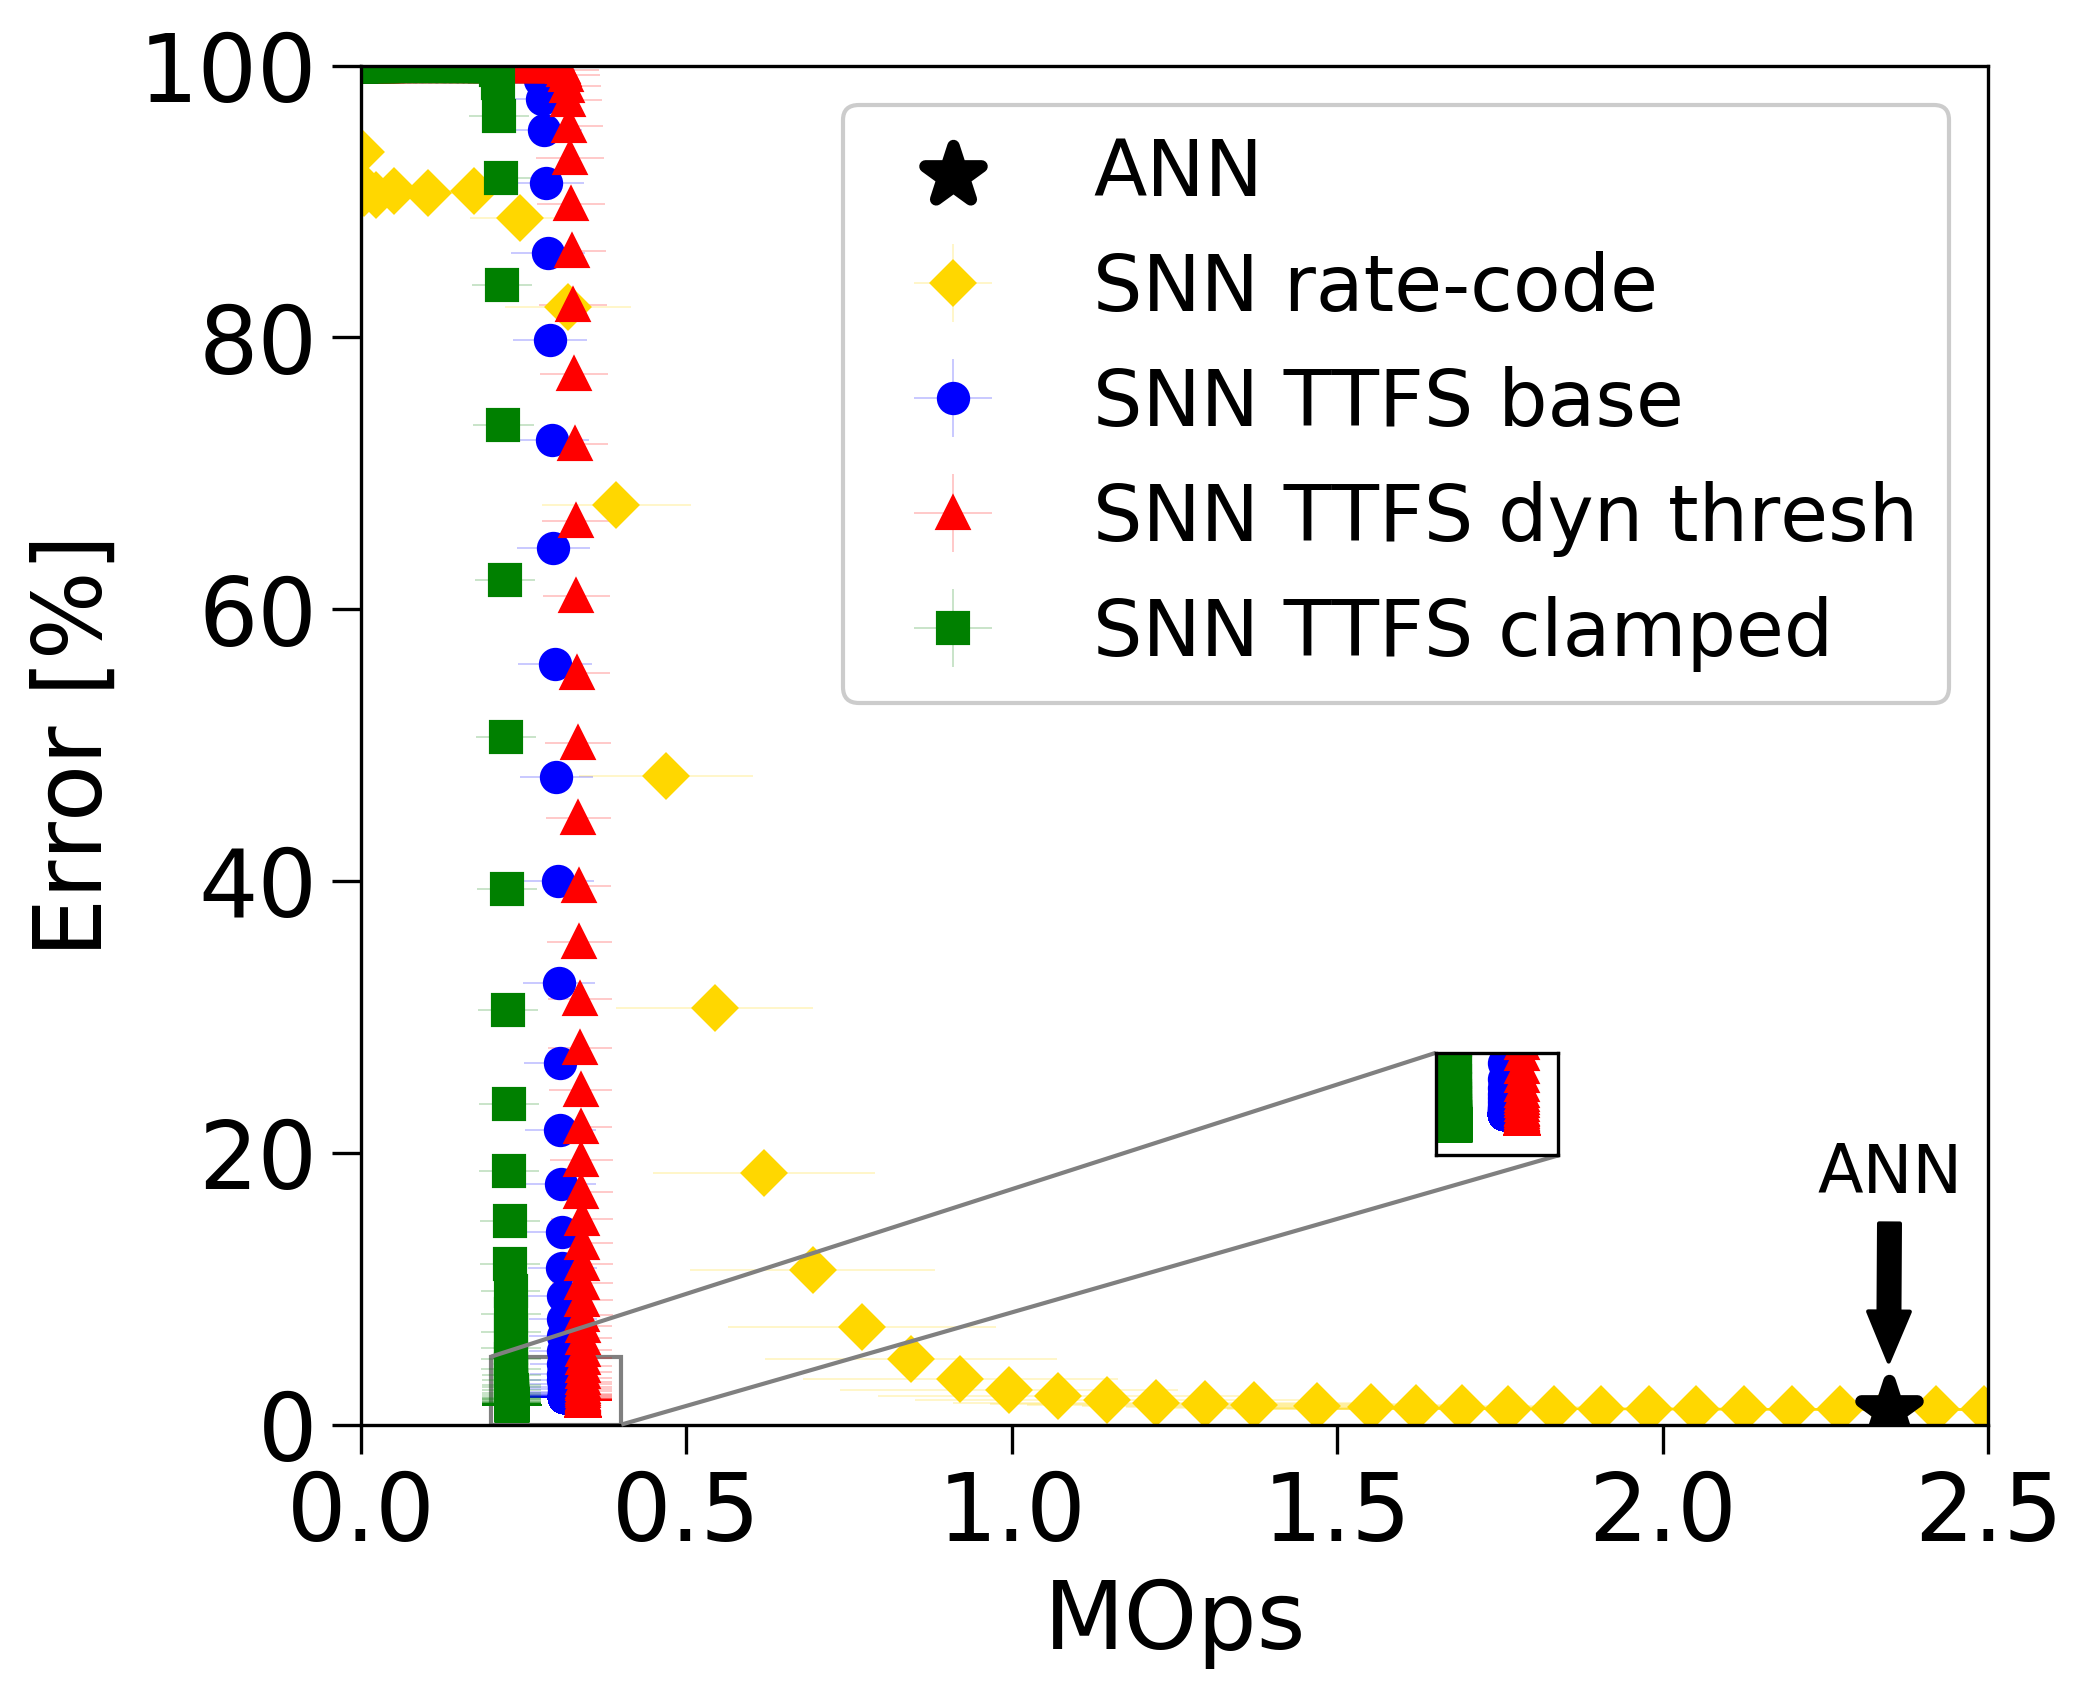

In [116]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, InsetPosition, mark_inset

show_numbers = False

fig, ax = plt.subplots()
axins = zoomed_inset_axes(ax, 5)

for exp in experiments:
    ax.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t, yerr=exp.e1_confidence95, 
                fmt=exp.marker, markersize=exp.markersize, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)
    axins.errorbar(exp.mean_computations_t, exp.e1_mean, markersize=exp.markersize,
                   fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)

axins.axis([0.2, 0.4, 0, 5])
ip = InsetPosition(axins, [0.25, 0.075, .65, .65])
axins.set_axes_locator(ip)

axins.set_xticks([])
axins.set_yticks([])
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

exp = experiments[0]
ax.scatter(exp.operations_ann, exp.e1_ann, marker='*', s=200, label='ANN', color='black', alpha=1, linewidths=3, zorder=10)
ax.annotate('ANN', xy=(exp.operations_ann, exp.e1_ann + 3), xytext=(exp.operations_ann - 0.11, exp.e1_ann + 16), 
            fontsize=16, arrowprops=dict(color='black', shrink=0.05, width=5, headwidth=10))

if show_numbers:
    plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.8, exp.e1_ann + 7), fontsize=16, color=exp.color1)
    plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.op1_0, exp.e1_0), xy=(exp.op1_0, exp.e1_0),
                 xytext=(exp.op1_0, exp.e1_0 + 13), fontsize=16,
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

ax.set_xlim(0, 2.5)
ax.set_ylim(0, 100)
ax.set_xlabel('MOps')
ax.set_ylabel('Error [%]')
leg = ax.legend(loc='upper right')
leg.get_frame().set_alpha(1)
# plt.title('ANN vs SNN performance')
fig.savefig(os.path.join(log_dir, 'err_vs_ops_mnist'), bbox_inches='tight')

In [73]:
for exp in experiments:
    print(exp.label)
    print('ANN top-1:                            ({:.5f} MOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1 best error:         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_0, exp.e1_0))
    print('SNN top-1 converged:        ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_1, exp.e1_1))
    print('')

rate-code
ANN top-1:                            (2.34673 MOps/frame, 1.04 %)
SNN top-1 best error:         (3.03230 MOps/frame, 1.07 %)
SNN top-1 converged:        (1.07141 MOps/frame, 2.07 %)

TTFS base
ANN top-1:                            (2.34673 MOps/frame, 1.04 %)
SNN top-1 best error:         (0.31159 MOps/frame, 2.00 %)
SNN top-1 converged:        (0.31128 MOps/frame, 3.00 %)

TTFS dyn thresh
ANN top-1:                            (2.34673 MOps/frame, 1.04 %)
SNN top-1 best error:         (0.34130 MOps/frame, 1.80 %)
SNN top-1 converged:        (0.34114 MOps/frame, 2.78 %)

TTFS clamped
ANN top-1:                            (2.34673 MOps/frame, 1.03 %)
SNN top-1 best error:         (0.23152 MOps/frame, 1.47 %)
SNN top-1 converged:        (0.23135 MOps/frame, 2.35 %)



In [41]:
exp = experiments[0]
print(exp.e1_mean[-150:])
t = np.min(np.nonzero(exp.e1_mean <= 1.61))
ops = exp.mean_computations_t[t]
print(ops)

[90.09 89.92 89.73 89.65 89.67 89.44 88.77 87.68 85.58 82.71 78.67 73.5
 67.78 61.3  54.34 47.09 40.95 34.33 28.81 23.33 19.1  15.5  12.36  9.95
  8.07  6.8   5.61  4.8   3.96  3.51  3.1   2.89  2.65  2.49  2.38  2.28
  2.17  2.12  2.04  2.01  1.99  1.91  1.87  1.87  1.83  1.83  1.82  1.78
  1.73  1.71  1.69  1.68  1.66  1.63  1.61  1.62  1.62  1.64  1.64  1.66
  1.66  1.66  1.67  1.66  1.67  1.66  1.66  1.65  1.65  1.64  1.66  1.67
  1.69  1.69  1.68  1.68  1.69  1.68  1.67  1.66  1.69  1.69  1.69  1.68
  1.66  1.66  1.65  1.66  1.66  1.66  1.66  1.64  1.64  1.63  1.65  1.65
  1.63  1.63  1.63  1.63  1.62  1.64  1.64  1.64  1.64  1.62  1.62  1.61
  1.62  1.62  1.62  1.62  1.61  1.61  1.61  1.61  1.6   1.6   1.6   1.6
  1.61  1.61  1.61  1.62  1.61  1.61  1.61  1.62  1.62  1.62  1.62  1.62
  1.62  1.62  1.62  1.62  1.63  1.62  1.62  1.62  1.62  1.62  1.61  1.61
  1.61  1.61  1.62  1.62  1.62  1.63]
0.34810692270000065


In [42]:
exp = experiments[3]
print(exp.e1_mean[-150:])
t = np.min(np.nonzero(exp.e1_mean <= 1.5))
ops = exp.mean_computations_t[t]
print(ops)

[90.   89.92 89.74 89.58 89.27 88.98 88.17 86.86 85.07 82.63 79.14 74.76
 69.8  63.78 56.67 49.67 42.35 35.9  30.05 25.1  20.49 16.74 14.05 11.55
  9.52  8.06  6.92  5.85  5.1   4.54  3.89  3.58  3.16  2.89  2.71  2.47
  2.3   2.17  2.06  1.95  1.87  1.81  1.74  1.72  1.69  1.63  1.61  1.57
  1.53  1.49  1.49  1.48  1.48  1.48  1.47  1.45  1.44  1.43  1.43  1.42
  1.41  1.39  1.38  1.37  1.37  1.37  1.38  1.36  1.37  1.36  1.36  1.36
  1.35  1.35  1.34  1.33  1.34  1.33  1.33  1.34  1.34  1.34  1.33  1.32
  1.32  1.33  1.33  1.33  1.34  1.35  1.35  1.37  1.37  1.37  1.36  1.36
  1.35  1.34  1.35  1.34  1.34  1.35  1.35  1.35  1.35  1.35  1.36  1.37
  1.37  1.37  1.38  1.38  1.39  1.38  1.38  1.38  1.39  1.4   1.4   1.4
  1.4   1.4   1.4   1.4   1.41  1.4   1.4   1.39  1.39  1.39  1.39  1.39
  1.39  1.4   1.4   1.4   1.4   1.41  1.41  1.4   1.4   1.4   1.4   1.4
  1.4   1.41  1.41  1.41  1.4   1.4 ]
0.2404998716000006


In [118]:
experiments[0].mean_computations_t

array([1.00000000e-10, 1.54344000e-05, 4.21775150e-03, 2.25456448e-02,
       5.03118092e-02, 1.03228023e-01, 1.73794919e-01, 2.44925242e-01,
       3.18305172e-01, 3.92299020e-01, 4.68242377e-01, 5.43228506e-01,
       6.18773413e-01, 6.94115512e-01, 7.69875428e-01, 8.45312162e-01,
       9.20609580e-01, 9.96106067e-01, 1.07141262e+00, 1.14634348e+00,
       1.22154180e+00, 1.29651986e+00, 1.37169354e+00, 1.46937523e+00,
       1.55182765e+00, 1.62079528e+00, 1.69063206e+00, 1.76148664e+00,
       1.83302229e+00, 1.90560422e+00, 1.97845582e+00, 2.05151463e+00,
       2.12496147e+00, 2.19847171e+00, 2.27222290e+00, 2.34578550e+00,
       2.41939989e+00, 2.49320877e+00, 2.56725043e+00, 2.64088166e+00,
       2.71492099e+00, 2.78863473e+00, 2.86252752e+00, 2.93691898e+00,
       3.03229950e+00, 3.12892367e+00, 3.20428837e+00, 3.26976108e+00,
       3.33665123e+00, 3.40495621e+00])

In [120]:
19/50

0.38